# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [370]:
#Import your libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Introduction

In this lab, we will use two datasets. Both datasets contain variables that describe apps from the Google Play Store. We will use our knowledge in feature extraction to process these datasets and prepare them for the use of a ML algorithm.

# Challenge 1 - Loading and Extracting Features from the First Dataset

#### In this challenge, our goals are: 

* Exploring the dataset.
* Identify the columns with missing values.
* Either replacing the missing values in each column or drop the columns.
* Conver each column to the appropriate type.

#### The first dataset contains different information describing the apps. 

Load the dataset into the variable `google_play` in the cell below. The dataset is in the file `googleplaystore.csv`

In [271]:
# Your code here:

google_play = pd.read_csv(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\5. Feature-Extraction\data\googleplaystore.csv')

#### Examine all variables and their types in the following cell

In [272]:
# Your code here:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Since this dataset only contains one numeric column, let's skip the `describe()` function and look at the first 5 rows using the `head()` function

In [273]:
# Your code here:
google_play.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### We can see that there are a few columns that could be coerced to numeric.

Start with the reviews column. We can evaluate what value is causing this column to be of object type finding the non-numeric values in this column. To do this, we recall the `to_numeric()` function. With this function, we are able to coerce all non-numeric data to null. We can then use the `isnull()` function to subset our dataframe using the True/False column that this function generates.

In the cell below, transform the Reviews column to numeric and assign this new column to the variable `Reviews_numeric`. Make sure to coerce the errors.

In [274]:
# Your code here:
google_play['Reviews_numeric']=pd.to_numeric(google_play['Reviews'], errors='coerce')
google_play.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0


Next, create a column containing True/False values using the `isnull()` function. Assign this column to the `Reviews_isnull` variable.

In [275]:
google_play.loc[10472]

App                Life Made WI-Fi Touchscreen Photo Frame
Category                                               1.9
Rating                                                19.0
Reviews                                               3.0M
Size                                                1,000+
Installs                                              Free
Type                                                     0
Price                                             Everyone
Content Rating                                         NaN
Genres                                   February 11, 2018
Last Updated                                        1.0.19
Current Ver                                     4.0 and up
Android Ver                                            NaN
Reviews_numeric                                        NaN
Name: 10472, dtype: object

In [276]:
# Your code here:
google_play['Reviews_isnull'] = google_play['Reviews_numeric'].isnull()

Finally, subset the `google_play` with `Reviews_isnull`. This should give you all the rows that contain non-numeric characters.

Your output should look like:

![Reviews_bool.png](reviews-bool.png)

In [277]:
# Your code here:
google_play[google_play['Reviews_isnull']]
#google_play[google_play['Reviews_numeric'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,True


#### We see that Google Play is using a shorthand for millions. 

Let's write a function to transform this data.

Steps:

1. Create a function that returns the correct numeric values of *Reviews*.
1. Define a test string with `M` in the last character.
1. Test your function with the test string. Make sure your function works correctly. If not, modify your functions and test again.

In [278]:
# Your code here

def convert_string_to_numeric(s):
    """
    Convert a string value to numeric. If the last character of the string is `M`, obtain the 
    numeric part of the string, multiply it with 1,000,000, then return the result. Otherwise, 
    convert the string to numeric value and return the result.
    
    Args:
        s: The Reviews score in string format.

    Returns:
        The correct numeric value of the Reviews score.
    """
    if 'm' in s.lower():
        s=s[:-1]
        s=float(s)
        s=s*1000000  
    else:
        s=float(s)
    return s

test_string = '4.0M'
convert_string_to_numeric(test_string)==4000000

True

The last step is to apply the function to the `Reviews` column in the following cell:

In [279]:
google_play['Reviews']=list(map(convert_string_to_numeric,google_play['Reviews']))

In [280]:
google_play.loc[10472]

App                Life Made WI-Fi Touchscreen Photo Frame
Category                                               1.9
Rating                                                19.0
Reviews                                          3000000.0
Size                                                1,000+
Installs                                              Free
Type                                                     0
Price                                             Everyone
Content Rating                                         NaN
Genres                                   February 11, 2018
Last Updated                                        1.0.19
Current Ver                                     4.0 and up
Android Ver                                            NaN
Reviews_numeric                                        NaN
Reviews_isnull                                        True
Name: 10472, dtype: object

In [281]:
# Your code here:
inp_str = "Python4Journaldev"
 
print("Original String : " + inp_str) 
num = ""
for c in inp_str:
    if c.isdigit():
        num = num + c
print("Extracted numbers from the list : " + num) 

Original String : Python4Journaldev
Extracted numbers from the list : 4


Check the non-numeric `Reviews` row again. It should have been fixed now and you should see:

![Reviews_bool_fixed.png](reviews-bool-fixed.png)

In [282]:
# Your code here
google_play[google_play['Reviews_isnull']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,True


Also check the variable types of `google_play`. The `Reviews` column should be a `float64` type now.

In [283]:
# Your code here:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10841 non-null  object 
 1   Category         10841 non-null  object 
 2   Rating           9367 non-null   float64
 3   Reviews          10841 non-null  float64
 4   Size             10841 non-null  object 
 5   Installs         10841 non-null  object 
 6   Type             10840 non-null  object 
 7   Price            10841 non-null  object 
 8   Content Rating   10840 non-null  object 
 9   Genres           10841 non-null  object 
 10  Last Updated     10841 non-null  object 
 11  Current Ver      10833 non-null  object 
 12  Android Ver      10838 non-null  object 
 13  Reviews_numeric  10840 non-null  float64
 14  Reviews_isnull   10841 non-null  bool   
dtypes: bool(1), float64(3), object(11)
memory usage: 1.2+ MB


#### The next column we will look at is `Size`. We start by looking at all unique values in `Size`:

*Hint: use `unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html))*.

In [284]:
# Your code here:
google_play['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

You should have seen lots of unique values of the app sizes.

#### While we can convert most of the `Size` values to numeric in the same way we converted the `Reviews` values, there is one value that is impossible to convert.

What is that badass value? Enter it in the next cell and calculate the proportion of its occurence to the total number of records of `google_play`.

In [285]:
#Badass value is "Varies with device"

In [286]:
# Your code here:
len(google_play[google_play['Size'] == "Varies with device"])/len(google_play['Size'])

0.15635089013928605

In [287]:
#It appears 15.6% of the time

#### While this column may be useful for other types of analysis, we opt to drop it from our dataset. 

There are two reasons. First, the majority of the data are ordinal but a sizeable proportion are missing because we cannot convert them to numerical values. Ordinal data are both numerical and categorical, and they usually can be ranked (e.g. 82k is smaller than 91M). In contrast, non-ordinal categorical data such as blood type and eye color cannot be ranked. The second reason is as a categorical column, it has too many unique values to produce meaningful insights. Therefore, in our case the simplest strategy would be to drop the column.

Drop the column in the cell below (use `inplace=True`)

In [288]:
# Your code here:
del google_play['Size']

#### Now let's look at how many missing values are in each column. 

This will give us an idea of whether we should come up with a missing data strategy or give up on the column all together. In the next column, find the number of missing values in each column: 

*Hint: use the `isna()` and `sum()` functions.*

In [289]:
# Your code here:
google_play.isna().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Last Updated          0
Current Ver           8
Android Ver           3
Reviews_numeric       1
Reviews_isnull        0
dtype: int64

You should find the column with the most missing values is now `Rating`.

#### What is the proportion of the missing values in `Rating` to the total number of records?

Enter your answer in the cell below.

In [290]:
# Your code here:
google_play['Rating'].isna().sum()/len(google_play['Rating'])

0.13596531685268887

A sizeable proportion of the `Rating` column is missing. A few other columns also contain several missing values.

#### We opt to preserve these columns and remove the rows containing missing data.

In particular, we don't want to drop the `Rating` column because:

* It is one of the most important columns in our dataset. 

* Since the dataset is not a time series, the loss of these rows will not have a negative impact on our ability to analyze the data. It will, however, cause us to lose some meaningful observations. But the loss is limited compared to the gain we receive by preserving these columns.

In the cell below, remove all rows containing at least one missing value. Use the `dropna()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)). Assign the new dataframe to the variable `google_missing_removed`.

In [291]:
# Your code here:
google_missing_removed=google_play.dropna(axis=0, how='any')

In [292]:
google_missing_removed.head(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,159.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,967.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,87510.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,215644.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,967.0,False


From now on, we use the `google_missing_removed` variable instead of `google_play`.

#### Next, we look at the `Last Updated` column.

The `Last Updated` column seems to contain a date, though it is classified as an object type. Let's convert this column using the `pd.to_datetime` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)).

In [294]:
# Your code here:
google_missing_removed.loc[:,'Last Updated']=pd.to_datetime(google_missing_removed['Last Updated'])

In [295]:
google_missing_removed.head(5)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_numeric,Reviews_isnull
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,159.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,967.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,87510.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,215644.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,967.0,False


#### The last column we will transform is `Price`. 

We start by looking at the unique values of this column.

In [296]:
# Your code here:
google_missing_removed['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Since all prices are ordinal data without exceptions, we can tranform this column by removing the dollar sign and converting to numeric. We can create a new column called `Price Numerical` and drop the original column.

We will achieve our goal in three steps. Follow the instructions of each step below.

#### First we remove the dollar sign. Do this in the next cell by applying the `str.replace` function to the column to replace `$` with an empty string (`''`).

In [298]:
google_missing_removed.loc[:,'Price']=pd.Series(google_missing_removed['Price'].str.replace("$","", regex=True))

In [299]:
google_missing_removed.loc[:,'Price'] = google_missing_removed["Price"].apply(lambda x: x.replace("$","") if x != 0 else 0 )

In [300]:
google_missing_removed['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [302]:
# Your code here:
#google_missing_removed['Price']=google_missing_removed['Price'].replace("$","")

#### Second step, coerce the `Price Numerical` column to numeric.

In [304]:
# Your code here:
google_missing_removed.loc[:,'Price Numerical']=pd.to_numeric(google_missing_removed['Price'], errors='coerce')

**Finally, drop the original `Price` column.**

In [305]:
# Your code here:
del google_missing_removed['Price']

Now check the variable types of `google_missing_removed`. Make sure:

* `Size` and `Price` columns have been removed.
* `Rating`, `Reviews`, and `Price Numerical` have the type of `float64`.
* `Last Updated` has the type of `datetime64`.

In [306]:
del google_missing_removed['Reviews_numeric']

In [307]:
del google_missing_removed['Reviews_isnull']

In [308]:
# Your code here
google_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              9360 non-null   object        
 1   Category         9360 non-null   object        
 2   Rating           9360 non-null   float64       
 3   Reviews          9360 non-null   float64       
 4   Installs         9360 non-null   object        
 5   Type             9360 non-null   object        
 6   Content Rating   9360 non-null   object        
 7   Genres           9360 non-null   object        
 8   Last Updated     9360 non-null   datetime64[ns]
 9   Current Ver      9360 non-null   object        
 10  Android Ver      9360 non-null   object        
 11  Price Numerical  9360 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 950.6+ KB


# Challenge 2 - Loading and Extracting Features from the Second Dataset

Load the second dataset to the variable `google_reviews`. The data is in the file `googleplaystore_user_reviews.csv`.

In [309]:
# Your code here:
# Your code here:

google_play = pd.read_csv(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\5. Feature-Extraction\data\googleplaystore_user_reviews.csv')

#### This dataset contains the top 100 reviews for each app. 

Let's examine this dataset using the `head` function

In [310]:
# Your code here
google_play.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### The main piece of information we would like to extract from this dataset is the proportion of positive reviews of each app. 

Columns like `Sentiment_Polarity` and `Sentiment_Subjectivity` are not to our interests because we have no clue how to use them. We do not care about `Translated_Review` because natural language processing is too complex for us at present (in fact the `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` columns are derived from `Translated_Review` the data scientists). 

What we care about in this challenge is `Sentiment`. To be more precise, we care about **what is the proportion of *Positive* sentiment of each app**. This will require us to aggregate the `Sentiment` data by `App` in order to calculate the proportions.

Now that you are clear about what we are trying to achieve, follow the steps below that will walk you through towards our goal.

#### Our first step will be to remove all rows with missing sentiment. 

In the next cell, drop all rows with missing data using the `dropna()` function and assign this new dataframe to `review_missing_removed`.

In [311]:
# Your code here:
review_missing_removed=google_play.dropna()

#### Now, use the `value_counts()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)) to get a sense on how many apps are in this dataset and their review counts.

In [315]:
# Your code here:
google_play['App'].value_counts()

CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
Angry Birds Classic                                  320
Helix Jump                                           300
8 Ball Pool                                          300
                                                    ... 
Detector de Radares Gratis                            31
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

#### Now the tough part comes. Let's plan how we will achieve our goal:

1. We will count the number of reviews that contain *Positive* in the `Sentiment` column.

1. We will create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app.

1. We will then loop the new dataframe to calculate the postivie review portion of each app.

#### Step 1: Count the number of positive reviews.

In the following cell, write a function that takes a column and returns the number of times *Positive* appears in the column. 

*Hint: One option is to use the `np.where()` function ([documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)).*

In [343]:
# Your code below

def positive_function(x):
    """
    Count how many times the string `Positive` appears in a column (exact string match).
    
    Args:
        x: data column
    
    Returns:
        The number of occurrences of `Positive` in the column data.
    """
    x_sum=np.where(x=='Positive',1,0)
    return x_sum

#### Step 2: Create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app

We will group `review_missing_removed` by the `App` column, then aggregate the grouped dataframe on the number of positive reviews and the total review counts of each app. The result will be assigned to a new variable `google_agg`. Here is the ([documentation on how to achieve it](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)). Take a moment or two to read the documentation and google examples because it is pretty complex.

When you obtain `google_agg`, check its values to make sure it has an `App` column as its index as well as a `Positive` column and a `Total` column. Your output should look like:

![Positive Reviews Agg](positive-review-agg.png)

*Hint: Use `positive_function` you created earlier as part of the param passed to the `agg()` function in order to aggregate the number of positive reviews.*

#### Bonus:

As of Pandas v0.23.4, you may opt to supply an array or an object to `agg()`. If you use the array param, you'll need to rename the columns so that their names are `Positive` and `Total`. Using the object param will allow you to create the aggregated columns with the desirable names without renaming them. However, you will probably encounter a warning indicating supplying an object to `agg()` will become outdated. It's up to you which way you will use. Try both ways out. Any way is fine as long as it works.

In [354]:
# Your code here:
review_missing_removed['Positive']=positive_function(review_missing_removed.Sentiment)
google_agg=review_missing_removed.groupby('App').agg({'Positive':'sum', 'Sentiment':'count'})

<ipython-input-354-1946dc436c3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_missing_removed['Positive']=positive_function(review_missing_removed.Sentiment)


Print the first 5 rows of `google_agg` to check it.

In [352]:
# Your code here
google_agg.head(5)

,Positive,Sentiment
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,39
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38


#### Add a derived column to `google_agg` that is the ratio of the `Positive` and the `Total` columns. Call this column `Positive Ratio`. 

Make sure to account for the case where the denominator is zero using the `np.where()` function.

In [355]:
# Your code here:
google_agg['Positive Ratio']=google_agg['Positive']/google_agg['Sentiment']

#### Now drop the `Positive` and `Total` columns. Do this with `inplace=True`.

In [356]:
# Your code here:
del google_agg['Positive']
del google_agg['Sentiment']

Print the first 5 rows of `google_agg`. Your output should look like:

![Positive Reviews Agg](positive-review-ratio.png)

In [357]:
# Your code here:
google_agg.head(5)

,Positive Ratio
App,
10 Best Foods for You,0.835052
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.775000
11st,0.589744
1800 Contacts - Lens Store,0.800000
1LINE – One Line with One Touch,0.710526


# Challenge 3 - Join the Dataframes

In this part of the lab, we will join the two dataframes and obtain a dataframe that contains features we can use in our ML algorithm.

In the next cell, join the `google_missing_removed` dataframe with the `google_agg` dataframe on the `App` column. Assign this dataframe to the variable `google`.

In [358]:
# Your code here:
google=pd.merge(google_missing_removed, google_agg, on="App")

#### Let's look at the final result using the `head()` function. Your final product should look like:

![Final Product](google-final-head.png)

In [359]:
# Your code here:
google.head(5)

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price Numerical,Positive Ratio
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
1,Coloring book moana,FAMILY,3.9,974.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,"1,000,000+",Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,0.0,0.711111
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,0.0,1.000000
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,"100,000+",Free,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,0.0,0.605263


 # Challenge 4- Feature selection and modelling

Let's work with data about bank marketing.  You can find the dataset and description in the data folder
Please use RFE, RFECV and SelectFomModel  for selecting the features from your dataset.

Step 1. Check your data. Clean and encode them if necessary

In [360]:
# Your code here:

df = pd.read_excel(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\5. Feature-Extraction\data\bank_marketing.xlsx')

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             41188 non-null  int64         
 1   job             41188 non-null  object        
 2   marital         41188 non-null  object        
 3   education       41188 non-null  object        
 4   default         41188 non-null  object        
 5   housing         41188 non-null  object        
 6   loan            41188 non-null  object        
 7   contact         41188 non-null  object        
 8   month           41188 non-null  object        
 9   day_of_week     41188 non-null  object        
 10  duration        41188 non-null  int64         
 11  campaign        41188 non-null  int64         
 12  pdays           41188 non-null  int64         
 13  previous        41188 non-null  int64         
 14  poutcome        41188 non-null  object        
 15  em

In [363]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate      17191
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed       33425
y                     0
dtype: int64

In [365]:
for el in df.columns:
    print(el)

age
job
marital
education
default
housing
loan
contact
month
day_of_week
duration
campaign
pdays
previous
poutcome
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
y


In [366]:
#too many na in those columns so we drop them :
del df['emp.var.rate']
del df['nr.employed']

In [377]:
#based on description : duration: last contact duration, in seconds (numeric). Important note:  
#this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not 
#known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only 
#be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
del df['duration']

In [378]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
dtype: int64

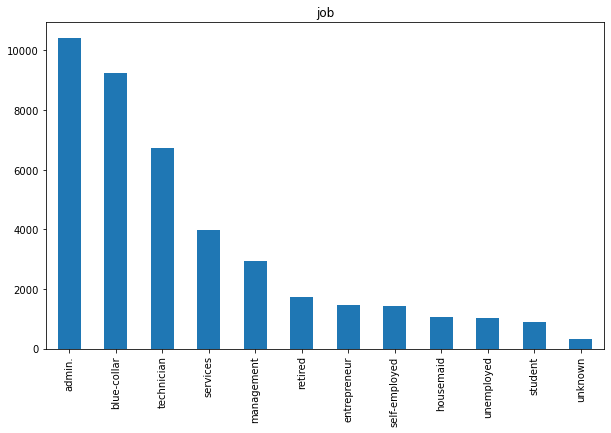

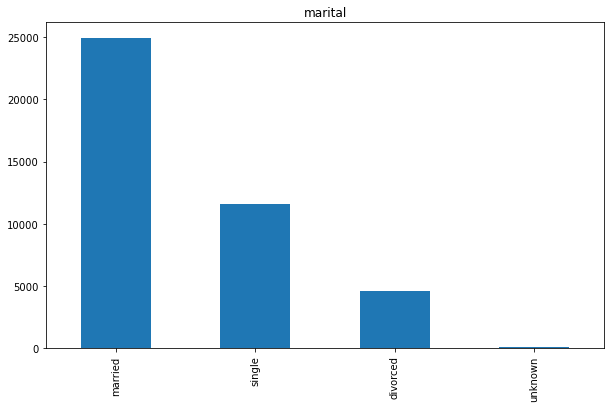

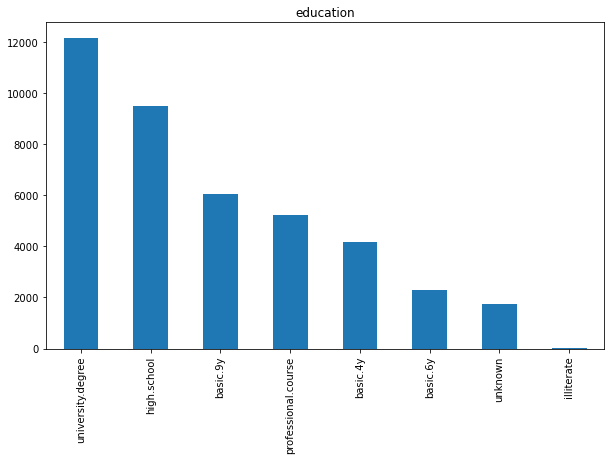

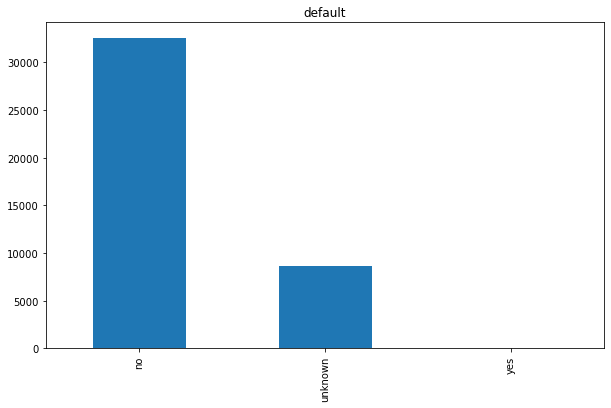

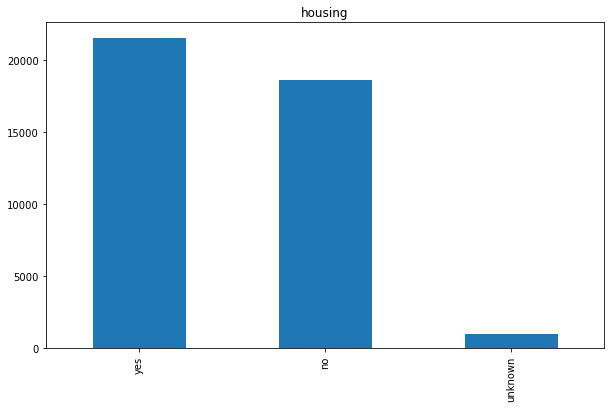

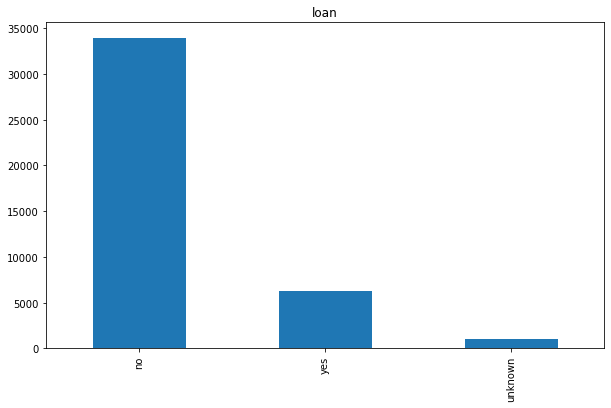

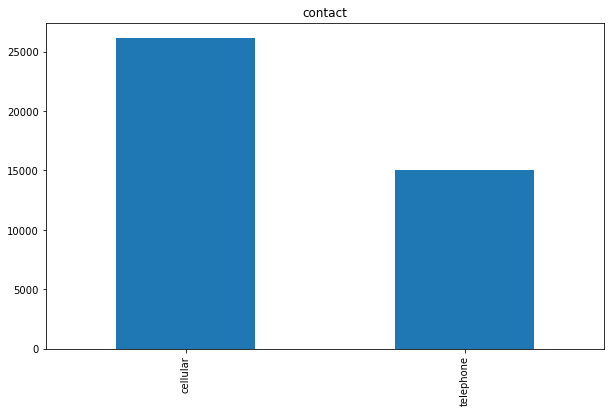

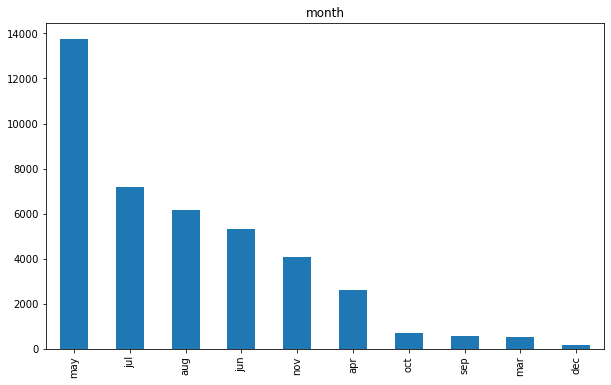

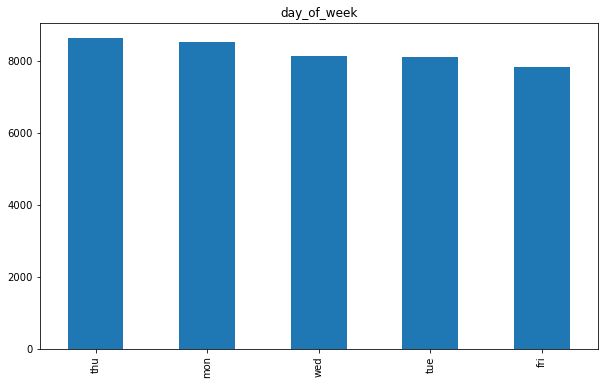

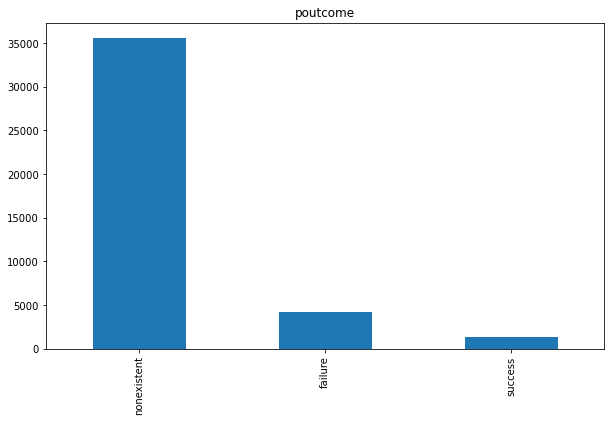

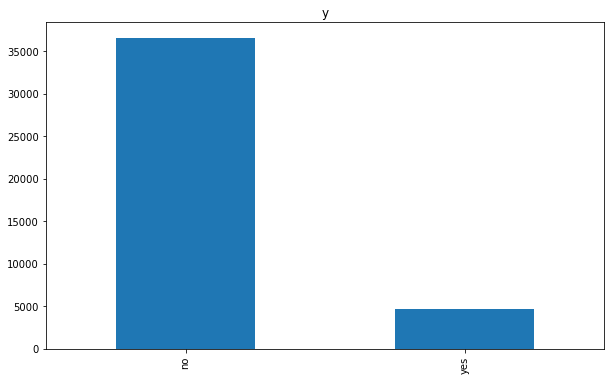

In [379]:
cat_df = df.select_dtypes(include=['object'])
cat_df.head()
for col in cat_df:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

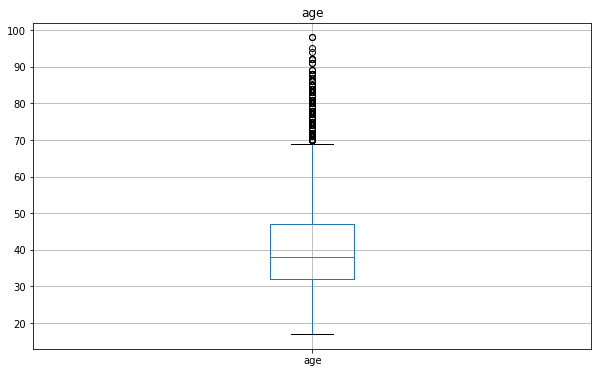

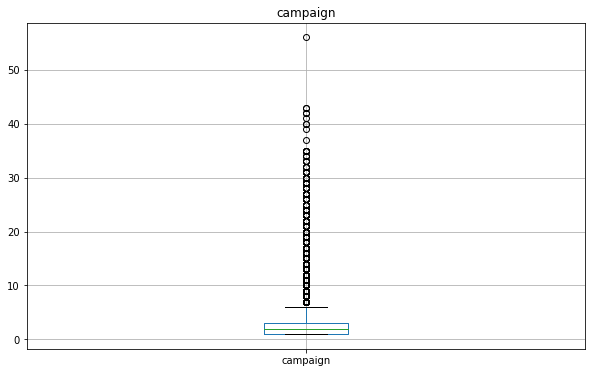

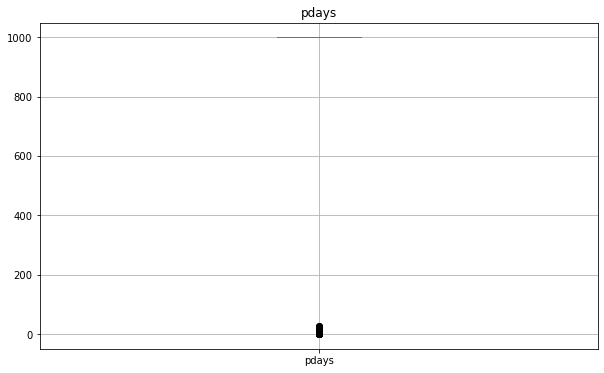

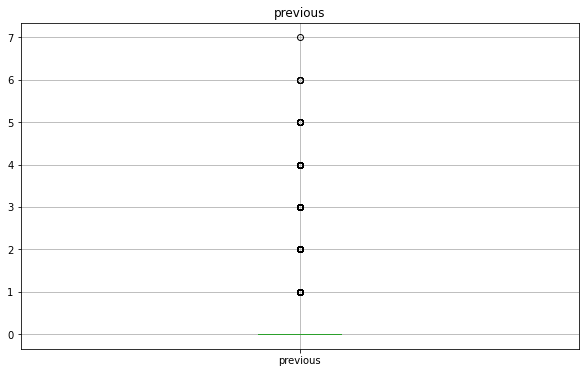

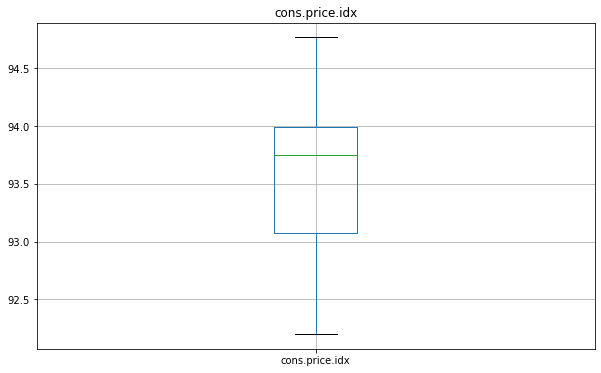

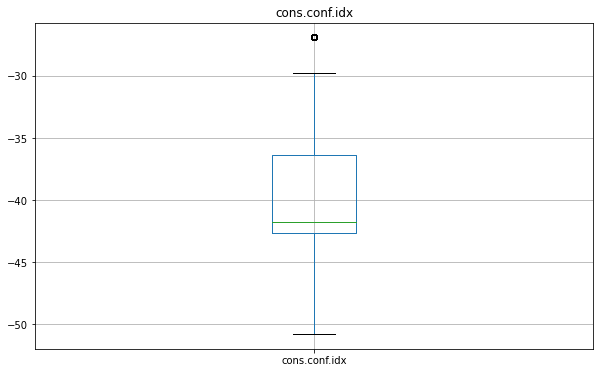

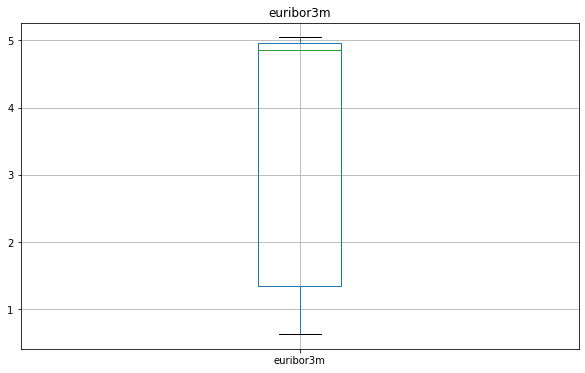

In [380]:
num_df = df.select_dtypes(exclude=['object'])
num_df.head()
for col in num_df:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [381]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [394]:
dic={"no":0,"yes":1}
for el in dic:
    df.loc[df['y'] == el, 'y'] = int(dic[el])

In [395]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0


In [396]:
df_enc=pd.get_dummies(df, drop_first=True)

Step 2. List your features

In [397]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [398]:
df_enc.columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_1'],
      dtype='object')

In [401]:
df_enc=df_enc.rename(columns={'y_1':'y'})

In [402]:
x=df_enc.drop(columns='y')
#x=df_enc.drop(index=[712],columns='survived')
#x_check=titanic_enc.tail(1).drop(columns='survived')
y=df_enc['y']

In [458]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [459]:
x_train.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
26078,32,2,999,0,93.200,-42.0,4.120,0,0,0,...,0,1,0,0,0,0,0,1,1,0
24197,38,1,999,0,93.200,-42.0,4.191,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1683,35,3,999,0,93.994,-36.4,4.855,0,1,0,...,1,0,0,0,0,0,0,0,1,0
40879,75,3,999,3,94.601,-49.5,0.959,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1878,25,2,999,0,93.994,-36.4,4.855,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Step 3. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data 
What is the accuracy for your models?

In [425]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#We need to have a normal distibution for LogisticRegression

In [413]:
from pandas_profiling import ProfileReport

In [414]:
profile = ProfileReport(df_enc, title="Pandas Profiling Report")

In [417]:
profile.to_file(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_3\5. Feature-Extraction\data\report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [424]:
from scipy import stats
for col in num_df:
    k2, p = stats.normaltest(df[col])
    alpha = 0.05
#print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected",col,"is not normal distribution with significance level of :",alpha)
        print("If",col,"is not binary, it needs to be standardized!")
    else:
        print("The null hypothesis cannot be rejected",col,"is normal distribution with significance level of :",alpha)

The null hypothesis can be rejected age is not normal distribution with significance level of : 0.05
If age is not binary, it needs to be standardized!
The null hypothesis can be rejected campaign is not normal distribution with significance level of : 0.05
If campaign is not binary, it needs to be standardized!
The null hypothesis can be rejected pdays is not normal distribution with significance level of : 0.05
If pdays is not binary, it needs to be standardized!
The null hypothesis can be rejected previous is not normal distribution with significance level of : 0.05
If previous is not binary, it needs to be standardized!
The null hypothesis can be rejected cons.price.idx is not normal distribution with significance level of : 0.05
If cons.price.idx is not binary, it needs to be standardized!
The null hypothesis can be rejected cons.conf.idx is not normal distribution with significance level of : 0.05
If cons.conf.idx is not binary, it needs to be standardized!
The null hypothesis ca

In [460]:
#We standardize the data for LogisticRegression only :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainS = sc.fit_transform(x_train)
x_testS = sc.transform(x_test)

In [461]:
#LogisticRegression works only on normal distribution so we standardise the data before to make sure it works.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_trainS, y_train)

LogisticRegression(random_state=0)

In [462]:
y_pred = lr.predict(x_testS)

The accuracy of the Logistic Regression is: 89.39062879339646 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7245
           1       0.68      0.23      0.34       993

    accuracy                           0.89      8238
   macro avg       0.79      0.61      0.64      8238
weighted avg       0.88      0.89      0.87      8238



<ipython-input-425-ddc88ef0940e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


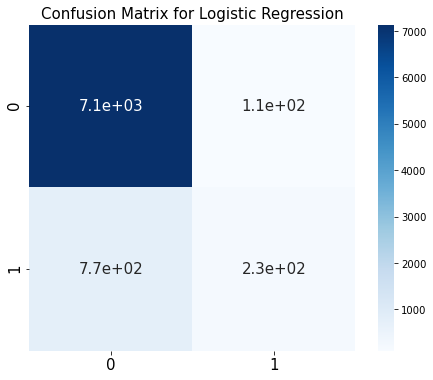

In [463]:
print('The accuracy of the Logistic Regression is:', lr.score(x_testS, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [428]:
from sklearn.ensemble import RandomForestClassifier

The accuracy of the Random Forest Classifier is: 88.44379703811605 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7245
           1       0.54      0.27      0.36       993

    accuracy                           0.88      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.86      0.88      0.87      8238



<ipython-input-425-ddc88ef0940e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


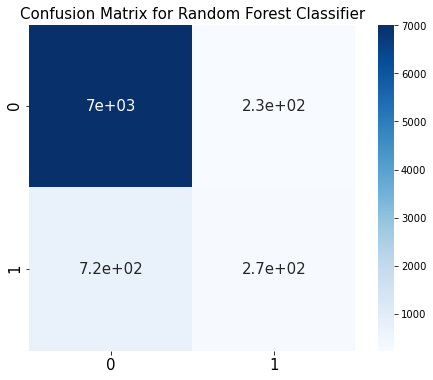

In [429]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')


Step 4. Select features using SelectFromModel method. Explain, how you define the optimal number of features


In [430]:
from sklearn.feature_selection import SelectFromModel
SFM = SelectFromModel(estimator=RandomForestClassifier()) #estimator RandomForest or Logistic Regression
#estimator=LogisticRegression() but standardize first
s=SFM.fit(x, y)

In [431]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['age', 'campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'marital_married', 'housing_yes', 'loan_yes',
       'poutcome_success'],
      dtype='object')

In [432]:
n_features = s.transform(x).shape[1]
n_features

10

In [433]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
SFM = SelectFromModel(estimator=LogisticRegression())
#estimator RandomForest or Logistic Regression
#estimator=LogisticRegression() but standardize first
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)
#y = sc.fit(y)

s=SFM.fit(X, y)

In [437]:
feature_idx = s.get_support()
feature_name = x.columns[feature_idx]
feature_name 

Index(['campaign', 'pdays', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'default_unknown', 'contact_telephone', 'month_mar', 'month_may',
       'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [439]:
n_features = s.transform(x).shape[1]
n_features

12

In [ ]:
#Based on our research, we can use 10 or 12 parameters. We decide to go for 12 in order to
#keep more data knowing that there were 50 columns initially

In [441]:
len(x.columns)

50

In [464]:
x_featured=pd.DataFrame()

In [465]:
for col in feature_name:
    x_featured[col]=x[col]

In [466]:
x_featured.head()

,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,default_unknown,contact_telephone,month_mar,month_may,day_of_week_mon,poutcome_nonexistent,poutcome_success
0,1,999,93.994,-36.4,4.857,0,1,0,1,1,1,0
1,1,999,93.994,-36.4,4.857,1,1,0,1,1,1,0
2,1,999,93.994,-36.4,4.857,0,1,0,1,1,1,0
3,1,999,93.994,-36.4,4.857,0,1,0,1,1,1,0
4,1,999,93.994,-36.4,4.857,0,1,0,1,1,1,0



Step 5. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (only selected features). What is the accuracy for your models?

In [467]:
x_train, x_test, y_train, y_test = train_test_split(x_featured, y, test_size=0.2, random_state=5)

In [468]:
x_train.head()

,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,default_unknown,contact_telephone,month_mar,month_may,day_of_week_mon,poutcome_nonexistent,poutcome_success
26078,2,999,93.200,-42.0,4.120,0,0,0,0,0,1,0
24197,1,999,93.200,-42.0,4.191,0,0,0,0,1,1,0
1683,3,999,93.994,-36.4,4.855,0,1,0,1,0,1,0
40879,3,999,94.601,-49.5,0.959,0,0,0,0,0,0,0
1878,2,999,93.994,-36.4,4.855,0,1,0,1,0,1,0


The accuracy of the Random Forest Classifier is: 88.83224083515417 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7245
           1       0.58      0.28      0.38       993

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      8238



<ipython-input-425-ddc88ef0940e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


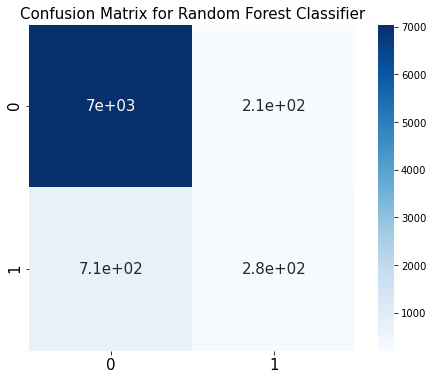

In [450]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

The accuracy of the Logistic Regression is: 89.3420733187667 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7245
           1       0.67      0.23      0.34       993

    accuracy                           0.89      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.87      0.89      0.87      8238



<ipython-input-425-ddc88ef0940e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


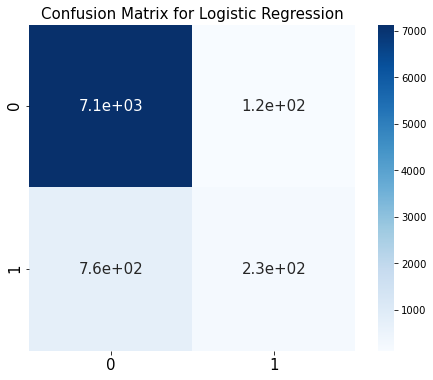

In [469]:
#LogisticRegression works only on normal distribution so we standardise the data before to make sure it works.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainS = sc.fit_transform(x_train)
x_testS = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_trainS, y_train)
y_pred = lr.predict(x_testS)
print('The accuracy of the Logistic Regression is:', lr.score(x_testS, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [ ]:
#We can see that the accuracy is almost equal with selected features (12) than with 52 parameters


Step 6. Select features using RFE and RFECV methods. Explain, how you define the optimal number of features for each of the cases.

In [470]:
x.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,93.994,-36.4,4.857,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,93.994,-36.4,4.857,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,93.994,-36.4,4.857,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,93.994,-36.4,4.857,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,93.994,-36.4,4.857,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [472]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [475]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = None, step = 1,verbose=1)
#If None, half of the features are selected. Else, look for the number of features specified
m=rfe_selector.fit(x, y)
x.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Num Features: 25
Selected Features: [ True  True  True  True  True  True  True  True False False  Tr

In [477]:
x.loc[:, m.support_].columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job_blue-collar', 'job_management',
       'job_technician', 'marital_married', 'marital_single',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'housing_yes', 'loan_yes', 'contact_telephone',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success'],
      dtype='object')

In [480]:
from sklearn.feature_selection import RFECV

In [481]:
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=2,
    step=5,
    n_jobs=-1, #multiprocessing: -1: use all available processor
    scoring="r2",
    cv=5,
    verbose=1)

m= rfecv.fit(x, y)

Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.
Fitting estimator with 20 features.
Fitting estimator with 15 features.
Fitting estimator with 10 features.
Fitting estimator with 5 features.


In [482]:
x.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 2
Selected Features: [ True False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
Feature Ranking: [ 1  2  2  3  3  2  1  6  8  9  6  7  8  7  8  4  9 11  3  5 11  8  6  4
 11  6  4  7  6 11 10  3 10  4  4 10 11 10  8  9  9 10  7  9  5  5  5  5
  7  3]


In [484]:
x.columns[rfecv.support_]

Index(['age', 'euribor3m'], dtype='object')

In [486]:
feature_name2=x.columns[rfecv.support_]

In [ ]:
#Based on this research let's check the results with only 2 features: 'age', 'euribor3m'

In [485]:
x_featured2=pd.DataFrame()

In [487]:
for col in feature_name2:
    x_featured2[col]=x[col]

In [488]:
x_featured2.head()

,age,euribor3m
0,56,4.857
1,57,4.857
2,37,4.857
3,40,4.857
4,56,4.857


Step 7. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (you will have 4 models, taking into account two sets of features that you got). What is the accuracy for your models?


In [489]:
x_train, x_test, y_train, y_test = train_test_split(x_featured2, y, test_size=0.2, random_state=5)

In [490]:
x_train.head()

,age,euribor3m
26078,32,4.120
24197,38,4.191
1683,35,4.855
40879,75,0.959
1878,25,4.855


The accuracy of the Random Forest Classifier is: 88.23743627093955 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7245
           1       0.52      0.29      0.37       993

    accuracy                           0.88      8238
   macro avg       0.71      0.63      0.65      8238
weighted avg       0.86      0.88      0.87      8238



<ipython-input-425-ddc88ef0940e>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


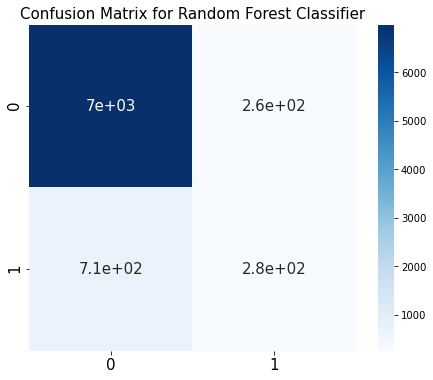

In [491]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [492]:
x_test.head()

,age,euribor3m
10833,47,4.962
6110,57,4.857
30213,35,1.365
34221,29,1.281
34416,44,1.266


The accuracy of the Logistic Regression is: 87.94610342316096 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7245
           1       0.00      0.00      0.00       993

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.77      0.88      0.82      8238



C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-425-ddc88ef0940e>:10: UserWarning: Ma

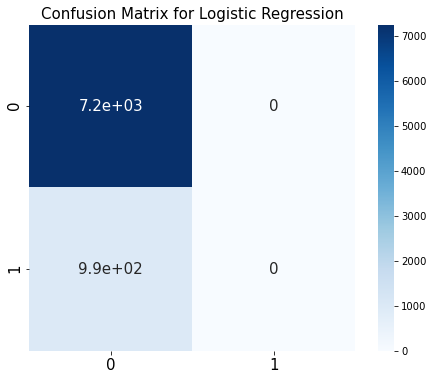

In [493]:
#LogisticRegression works only on normal distribution so we standardise the data before to make sure it works.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainS = sc.fit_transform(x_train)
x_testS = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_trainS, y_train)
y_pred = lr.predict(x_testS)
print('The accuracy of the Logistic Regression is:', lr.score(x_testS, y_test) * 100, '%')
generate_results(lr, y_pred, 'Logistic Regression')

In [ ]:
#The issue with this result is that our model cannot make a difference between the output and put everything in 0.
#this model is not accurate










Step 8. Please make the conclusion about the utility of the feature selection

In [ ]:
#Finally, we notice in this reseach that with the right feature selection, we can reduce drastically the number of feature
#without impacting results of our model.
#But at some point, with too small features, the model is not accurate anymore since it puts everything